# Machine Learning Assignment 1

Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

# k Nearest Neighbours 


 In this project, I build a k Nearest Neighbours classifier to classify the patients suffering from Breast Cancer. I have used the Breast Cancer Wisconsin (Original) Data Set downloaded from the UCI Machine Learning Repository.

# Dataset Description

The data set can be found at the following url:-
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

The attribute information of this dataset is as follows:-

1.Sample code number: id number

2.Clump Thickness: 1 - 10

3.Uniformity of Cell Size: 1 - 10

4.Uniformity of Cell Shape: 1 - 10

5.Marginal Adhesion: 1 - 10

6.Single Epithelial Cell Size: 1 - 10

7.Bare Nuclei: 1 - 10

8.Bland Chromatin: 1 - 10

9.Normal Nucleoli: 1 - 10

10.Mitoses: 1 - 10

11.Class: (2 for benign, 4 for malignant)

# Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = r'C:\Users\lenovo1\Downloads\archive (3)/breast-cancer-wisconsin.data.txt'

df = pd.read_csv(data, header=None)

In [3]:
df.shape


(699, 11)

In [4]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data cleaning


In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

In [6]:
df.head()


,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


df.dtypes


In [9]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')


In [10]:
df.dtypes


Id                               int64
Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [11]:
df.isna().sum()


Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [12]:
df['Bare_Nuclei'].value_counts()


1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [13]:
df['Bare_Nuclei'].unique()


array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [14]:
df['Bare_Nuclei'].isna().sum()


16

In [15]:
df['Class']

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [16]:
median = df['Bare_Nuclei'].median()
df['Bare_Nuclei'].fillna(median, inplace=True)

In [17]:
df.drop('Id', axis=1, inplace=True)


In [18]:
df.isna().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [19]:
df['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

In [20]:
round(df['Class'].value_counts()*100/df['Class'].value_counts().sum(), 2)


2    65.52
4    34.48
Name: Class, dtype: float64

# Exploratory Data Analysis 

Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

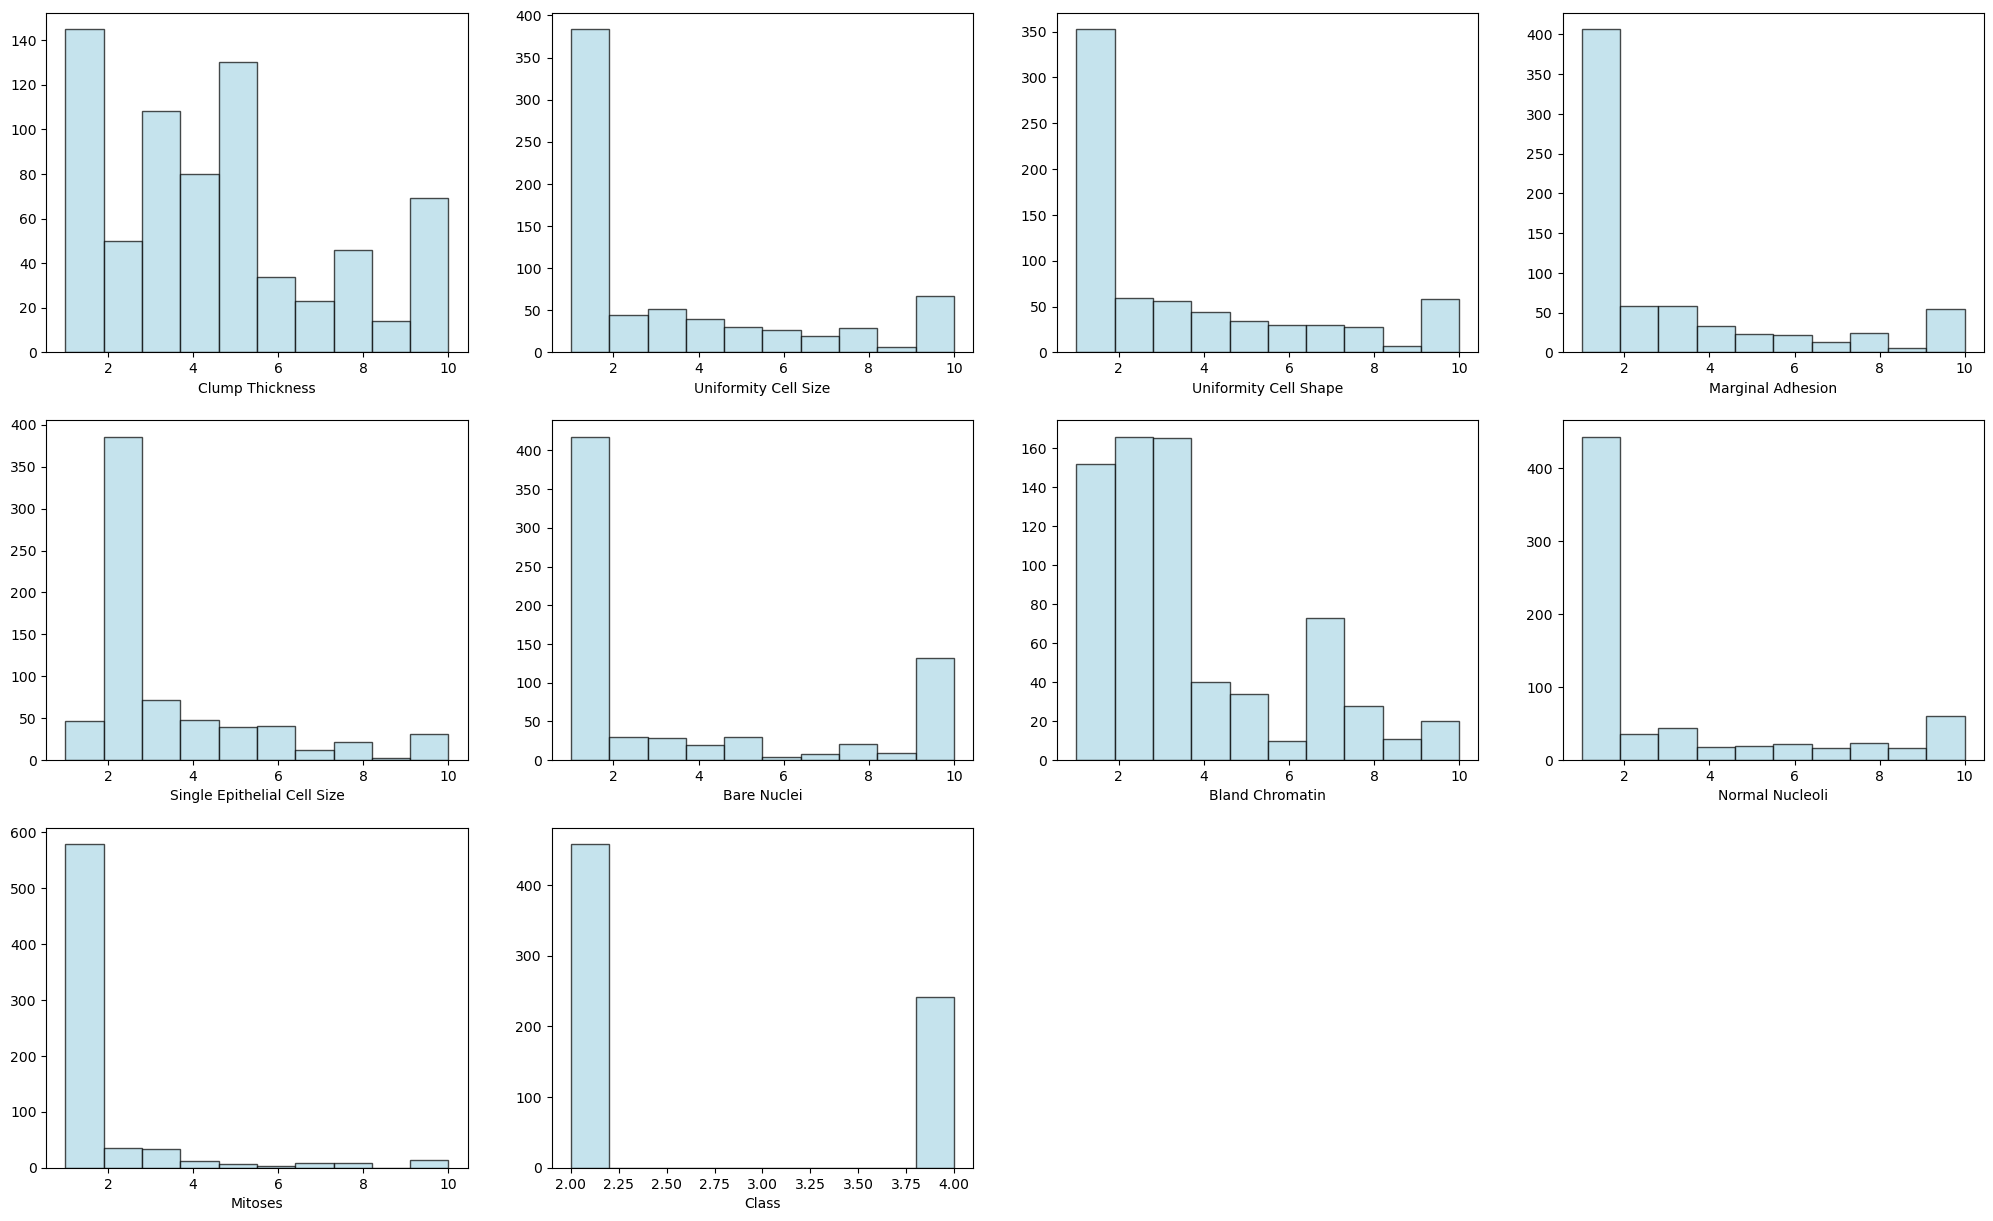

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))

plt.subplot(3, 4, 1)
plt.hist(df['Clump_thickness'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Clump Thickness')

plt.subplot(3, 4, 2)
plt.hist(df['Uniformity_Cell_Size'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Uniformity Cell Size')

plt.subplot(3, 4, 3)
plt.hist(df['Uniformity_Cell_Shape'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Uniformity Cell Shape')

plt.subplot(3, 4, 4)
plt.hist(df['Marginal_Adhesion'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Marginal Adhesion')

plt.subplot(3, 4, 5)
plt.hist(df['Single_Epithelial_Cell_Size'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Single Epithelial Cell Size')

plt.subplot(3, 4, 6)
plt.hist(df['Bare_Nuclei'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Bare Nuclei')

plt.subplot(3, 4, 7)
plt.hist(df['Bland_Chromatin'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Bland Chromatin')

plt.subplot(3, 4, 8)
plt.hist(df['Normal_Nucleoli'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Normal Nucleoli')

plt.subplot(3, 4, 9)
plt.hist(df['Mitoses'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mitoses')

plt.subplot(3, 4, 10)
plt.hist(df['Class'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Class')

plt.show()


We can see that all the variables in the dataset are positively skewed.


In [22]:
df.describe().iloc[:,1:9].T[['mean','50%']]


,mean,50%
Uniformity_Cell_Size,3.134478,1.0
Uniformity_Cell_Shape,3.207439,1.0
Marginal_Adhesion,2.806867,1.0
Single_Epithelial_Cell_Size,3.216023,2.0
Bare_Nuclei,3.486409,1.0
Bland_Chromatin,3.437768,3.0
Normal_Nucleoli,2.866953,1.0
Mitoses,1.589413,1.0


ClumpThickness : slighty right skewed

Cell Size : right skewed

Cell Shape : right skewed

Marginal Adhesion : right skewed

Single Epithelial Cell Size : right skewed

Normal Nucleoli: right skewed

Bland Chromatin : right skewed

Mitoses : right skewed

We can see that all the variables in the dataset are positively skewed.


# CORRELATION:-

In [23]:
corr = df.corr()
corr_values = corr['Class'].sort_values().round(3)
corr_values

Mitoses                        0.423
Single_Epithelial_Cell_Size    0.683
Marginal_Adhesion              0.697
Normal_Nucleoli                0.712
Clump_thickness                0.716
Bland_Chromatin                0.757
Uniformity_Cell_Size           0.818
Uniformity_Cell_Shape          0.819
Bare_Nuclei                    0.819
Class                          1.000
Name: Class, dtype: float64

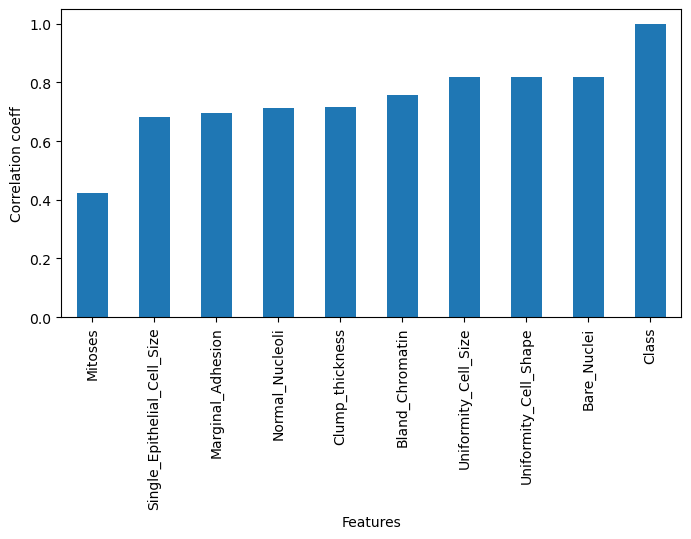

In [24]:
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

All feature variables demonstrate positive correlations with the target feature "class,"  indicating that higher values in these attributes tend to coincide with a higher likelihood of belonging to the target class.

Among these attributes, "Mitoses" exhibits the lowest correlation coefficient, indicating a moderately weak correlation with "Class.".

Conversely, attributes such as "Single Epithelial Cell Size,"  "Marginal Adhesion,"  "Normal Nucleoli,"  "Clump Thickness,"  and "Bland Chromatin" demonstrate more significant correlations with "Class.".

Moreover, "Uniformity of Cell Shape,"  "Uniformity of Cell Size,"  and "Bare Nuclei" display notably strong correlations with "Class,"  with "Bare Nuclei" showcasing the highest correlation coefficient.

These findings underscore the varying degrees of association between individual attributes and the target feature, providing valuable insights into their respective contributions to the classification task at hand.

In [25]:
corr.round(2)


,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.00,0.64,0.65,0.49,0.52,0.59,0.56,0.54,0.35,0.72
Uniformity_Cell_Size,0.64,1.00,0.91,0.71,0.75,0.69,0.76,0.72,0.46,0.82
Uniformity_Cell_Shape,0.65,0.91,1.00,0.68,0.72,0.71,0.74,0.72,0.44,0.82
Marginal_Adhesion,0.49,0.71,0.68,1.00,0.60,0.67,0.67,0.60,0.42,0.70
Single_Epithelial_Cell_Size,0.52,0.75,0.72,0.60,1.00,0.58,0.62,0.63,0.48,0.68
Bare_Nuclei,0.59,0.69,0.71,0.67,0.58,1.00,0.67,0.57,0.34,0.82
Bland_Chromatin,0.56,0.76,0.74,0.67,0.62,0.67,1.00,0.67,0.34,0.76
Normal_Nucleoli,0.54,0.72,0.72,0.60,0.63,0.57,0.67,1.00,0.43,0.71
Mitoses,0.35,0.46,0.44,0.42,0.48,0.34,0.34,0.43,1.00,0.42
Class,0.72,0.82,0.82,0.70,0.68,0.82,0.76,0.71,0.42,1.00


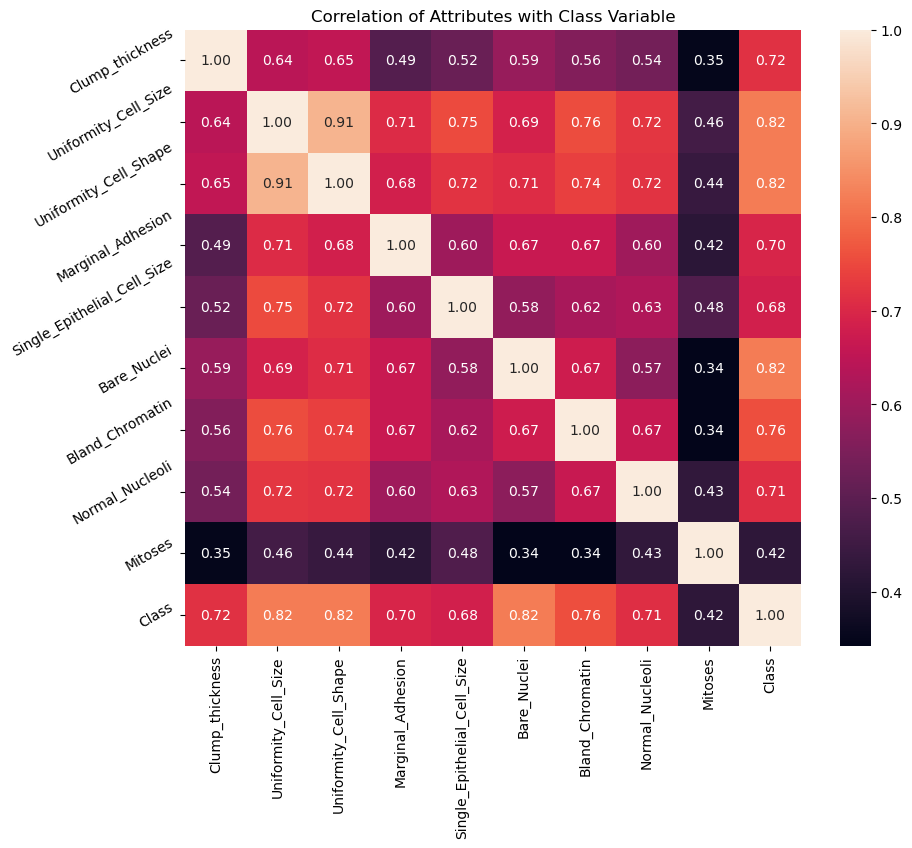

In [26]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes with Class Variable')

correlation = df.corr()

heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)

plt.show()

# Interpretation
From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

# Class: (2 for benign, 4 for malignant)

Relationship of Class (Benign and malignant) with Clump Thickness.

Benign: Non-cancerous growth that does not invade nearby tissues or spread to other parts of the body. Usually slow-growing and well-defined. Not typically life-threatening.

Malignant: Cancerous growth that can invade nearby tissues and spread to other parts of the body (metastasize). Grows rapidly and may not have a distinct boundary. Considered life-threatening and requires aggressive treatment.


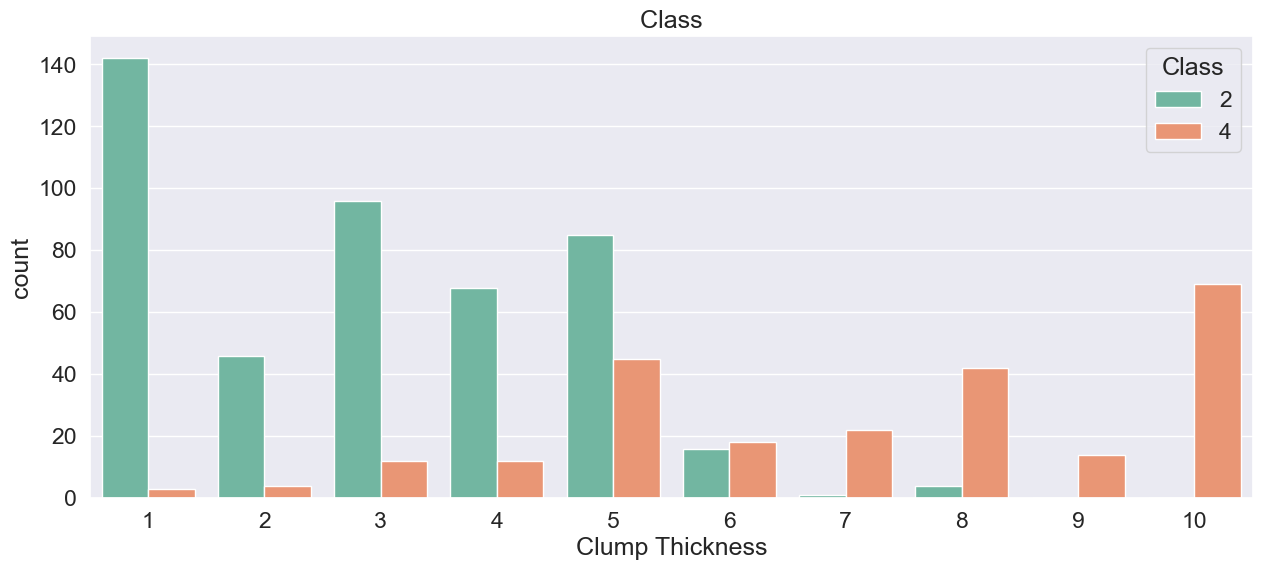

In [27]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Clump_thickness', hue='Class', data=df, palette='Set2')
plt.xlabel('Clump Thickness')
plt.title(' Class ')
plt.show()

There are more patients diagnosed with benign cancer than malignant cancer at all clump thickness scores.

the number of patients diagnosed with benign cancer peaks at a clump thickness score of 1, while the number of patients diagnosed with malignant cancer peaks at a clump thickness score of 5.

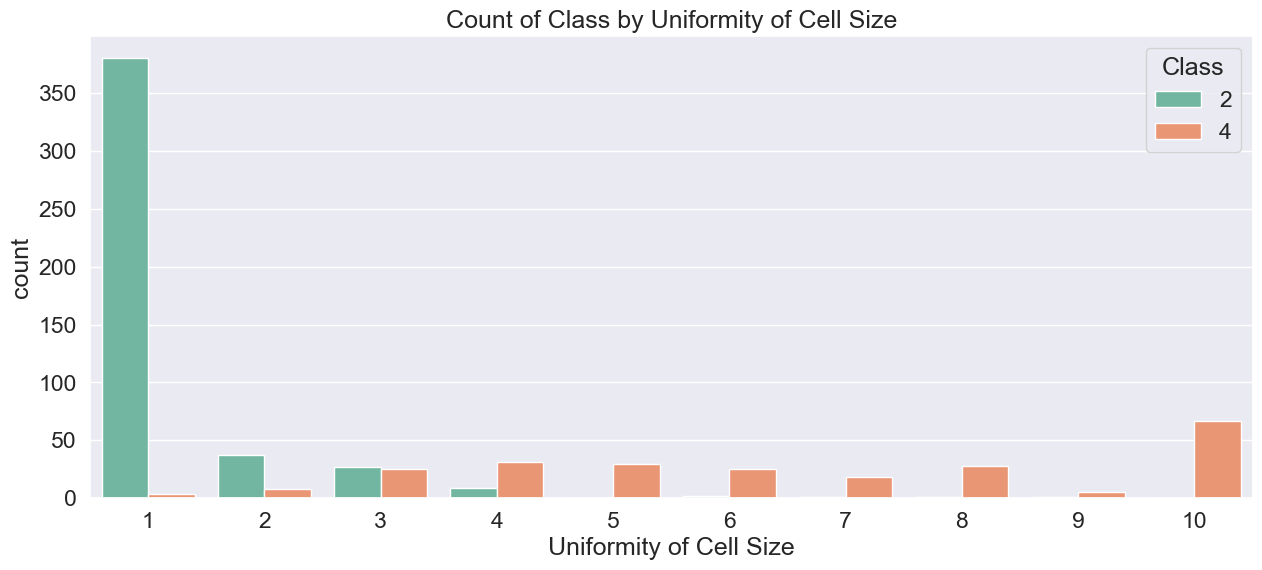

In [28]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Uniformity_Cell_Size', hue='Class', data=df, palette='Set2')
plt.xlabel('Uniformity of Cell Size')
plt.title('Count of Class by Uniformity of Cell Size')
plt.show()

The number of patients diagnosed with benign cancer peaks at a uniformity score of 1, while the number of patients diagnosed with malignant cancer peaks at a score of 4. Cancer with less uniform cell sizes (scores 1-4) are more likely to be benign and cancer with more uniform cell sizes (scores 7-10) are more likely to be malignant.

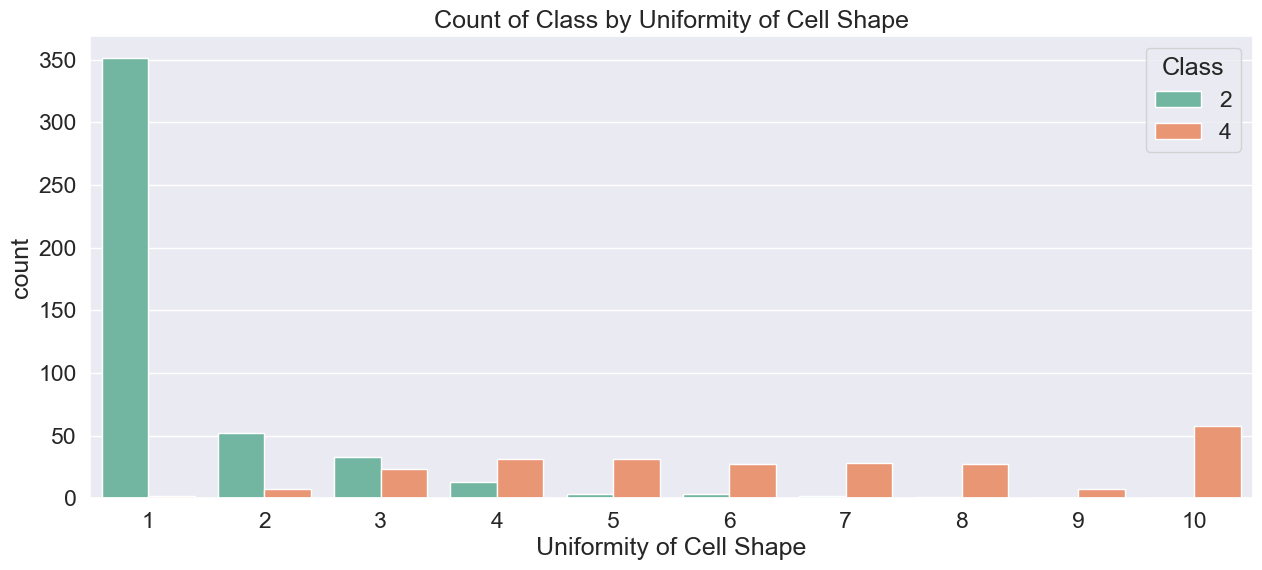

In [29]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Uniformity_Cell_Shape', hue='Class', data=df, palette='Set2')
plt.xlabel('Uniformity of Cell Shape')
plt.title('Count of Class by Uniformity of Cell Shape')
plt.show()

It shows that there are more cases of benign breast cancer (class 2) than malignant breast cancer (class 4) for all values of uniformity of cell shape. However, the number of malignant cases increases as the uniformity of cell shape  increasses. This means that high uniformity of cell shape is a strong indicator of malignancy.

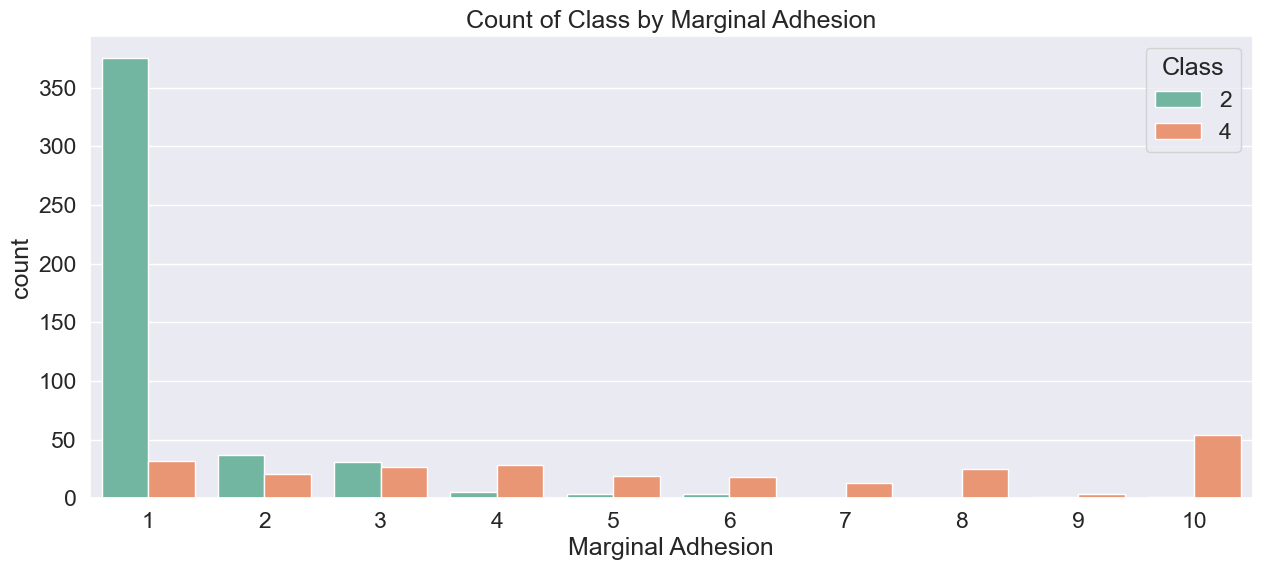

In [30]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Marginal_Adhesion', hue='Class', data=df, palette='Set2')
plt.xlabel('Marginal Adhesion')
plt.title('Count of Class by Marginal Adhesion')
plt.show()

There are more cases of benign breast cancer with marginal adhesion than malignant cases.The number of cases of malignant cancer increases as the degree of marginal adhesion increases, up to a peak at level 3 with sudden decrease of benign cancer at level 3.

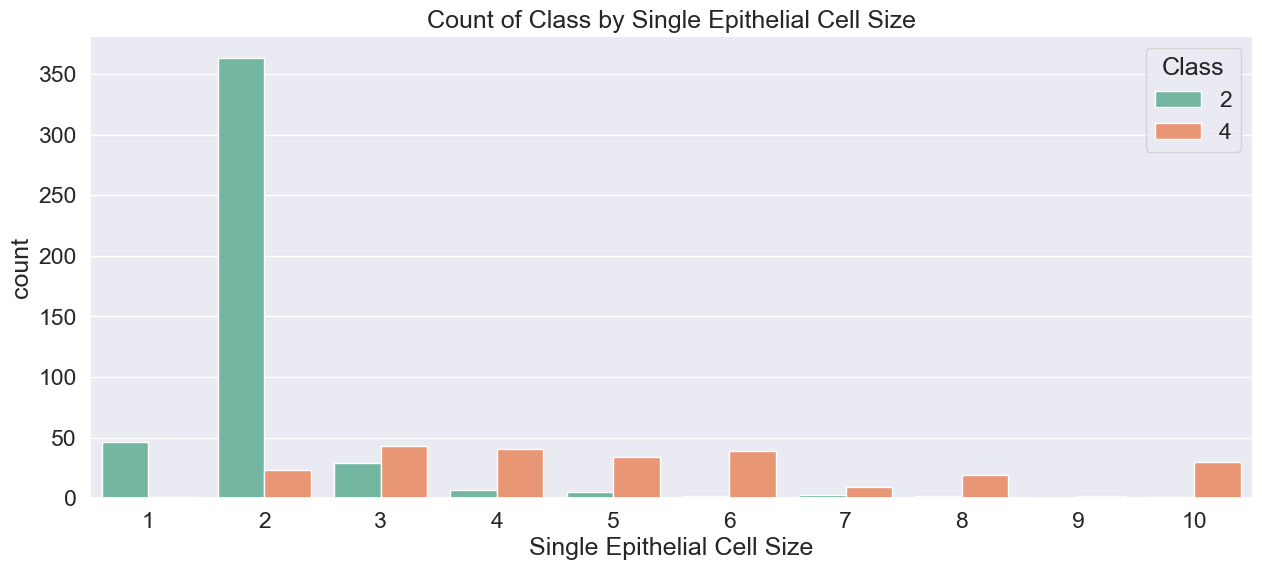

In [31]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Single_Epithelial_Cell_Size', hue='Class', data=df, palette='Set2')
plt.xlabel('Single Epithelial Cell Size')
plt.title('Count of Class by Single Epithelial Cell Size')
plt.show()

The epithelial cells in benign tumors (class 2) tend to be smaller than those in malignant tumors with marginal adhesion (class 4).  The graph shows two distinct peaks, one for each class. The peak for benign tumors is at a smaller size than the peak for malignant tumors, further supporting the observation that benign tumors tend to have smaller cells.

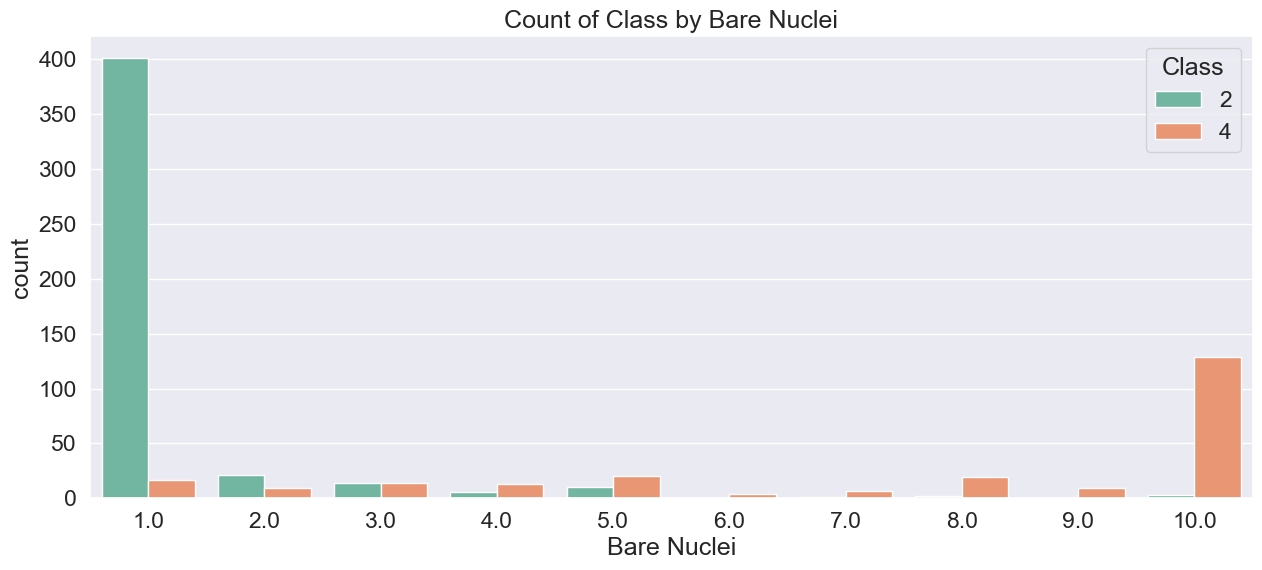

In [32]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Bare_Nuclei', hue='Class', data=df, palette='Set2')
plt.xlabel('Bare Nuclei')
plt.title('Count of Class by Bare Nuclei')
plt.show()

The peak for benign tumors is at a lower number of bare nuclei per case than the peak for malignant tumors. This suggests that benign tumors are more likely to have fewer bare nuclei than malignant tumors.

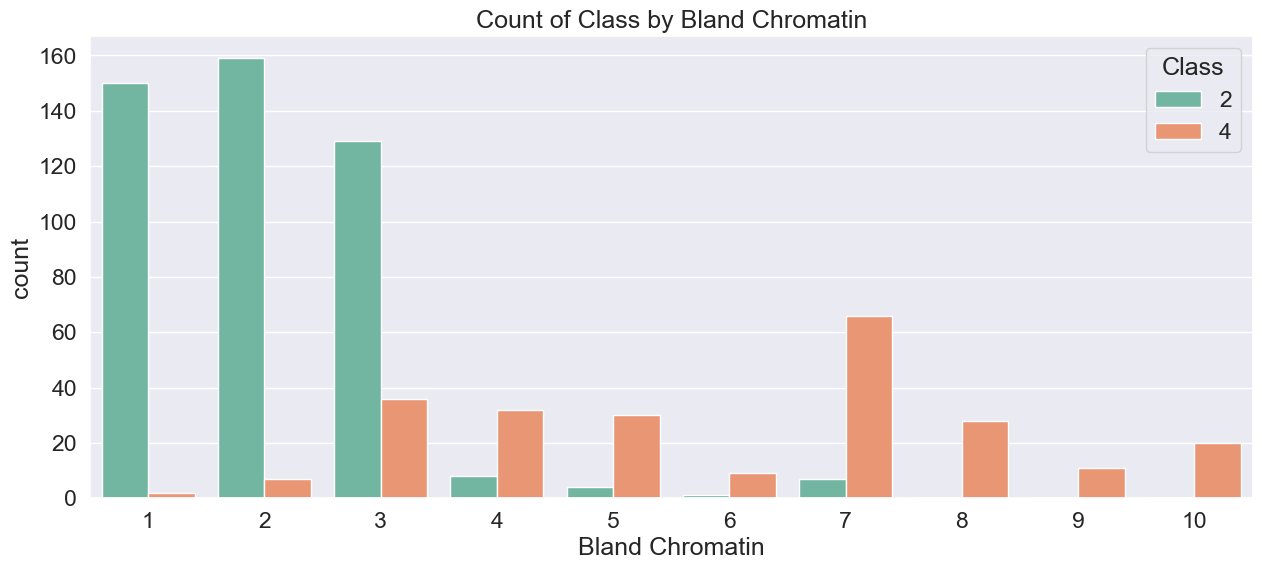

In [33]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Bland_Chromatin', hue='Class', data=df, palette='Set2')
plt.xlabel('Bland Chromatin')
plt.title('Count of Class by Bland Chromatin')
plt.show()

The number of cases of both benign and malignant cancer increases as the degree of bland chromatin increases, up to a peak at level 3 or 4. After the peak, the number of cases of both benign and malignant cancer decreases.

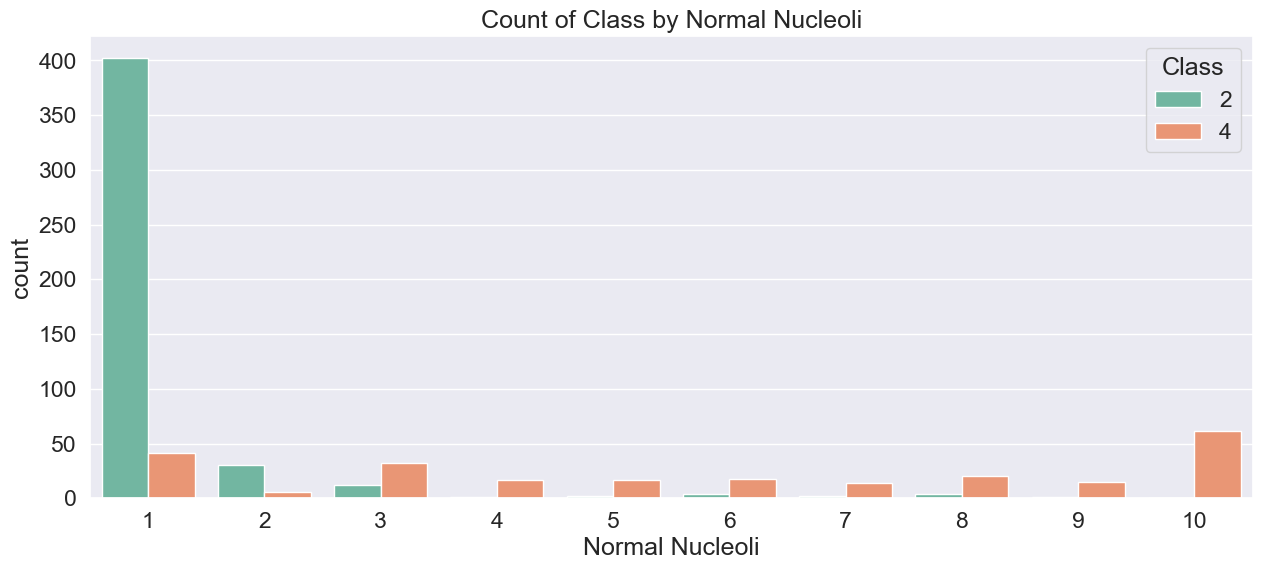

In [34]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Normal_Nucleoli', hue='Class', data=df, palette='Set2')
plt.xlabel('Normal Nucleoli')
plt.title('Count of Class by Normal Nucleoli')
plt.show()


It shows that there is more variability in the number of normal nuclei within malignant tumors.

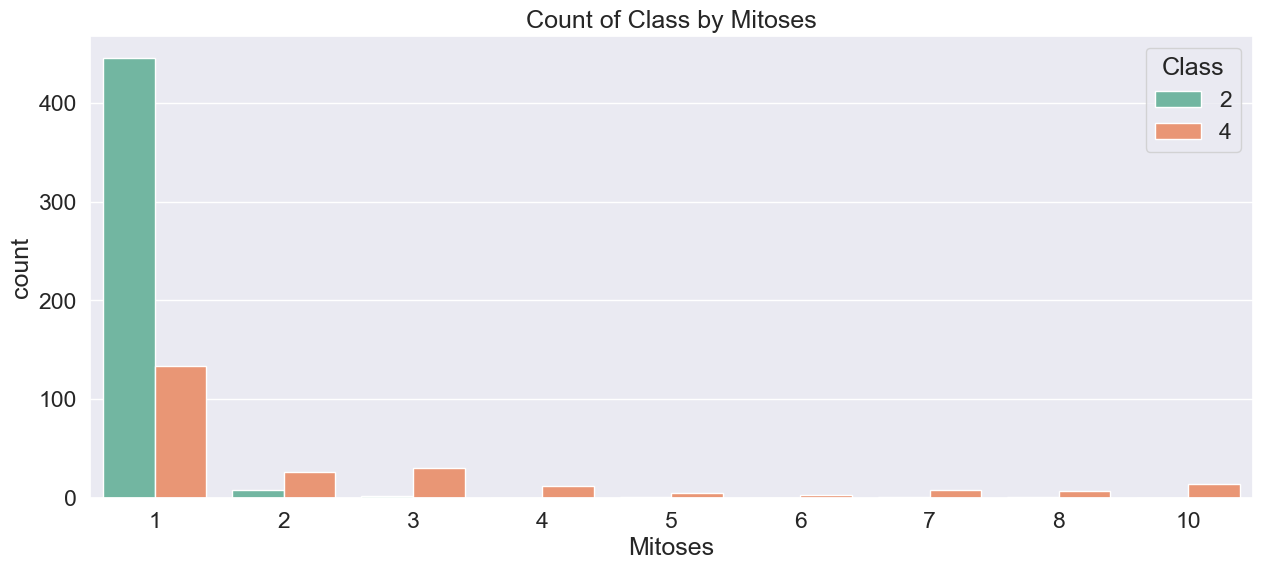

In [35]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='Mitoses', hue='Class', data=df, palette='Set2')
plt.xlabel('Mitoses')
plt.title('Count of Class by Mitoses')
plt.show()

 There are significantly more cases of malignant breast cancer with high mitosis than benign cases.The number of benign tumors with mitosis increases gradually as the number of mitoses increases, peaking at around 2-3 mitoses . After that, the number of cases starts to decrease. A higher number of mitoses is more strongly associated with malignant tumors compared to benign tumors.


# CONCLUSION:-


Benign breast cancer cases outnumber malignant ones across all clump thickness scores, with a peak at score 1 for benign and score 5 for malignant cases.
Higher uniformity scores (7-10) strongly indicate malignancy, contrasting with benign cases peaking at score 1.
While there are more benign cases with marginal adhesion, malignancy peaks at level 3, indicating a shift in dominance.
Benign tumors tend to feature smaller epithelial cells compared to malignant tumors with marginal adhesion.
Malignant tumors typically have a higher count of bare nuclei per case compared to benign tumors.
Both benign and malignant cancer cases increase as bland chromatin levels rise, peaking at level 3 or 4.
Malignant tumors exhibit more variability in the number of normal nuclei compared to benign tumors.
High mitosis numbers are significantly associated with malignant breast cancer, while benign cases peak at around 2-3 mitoses  before decreasing.


# Detecting outliers and anomalies

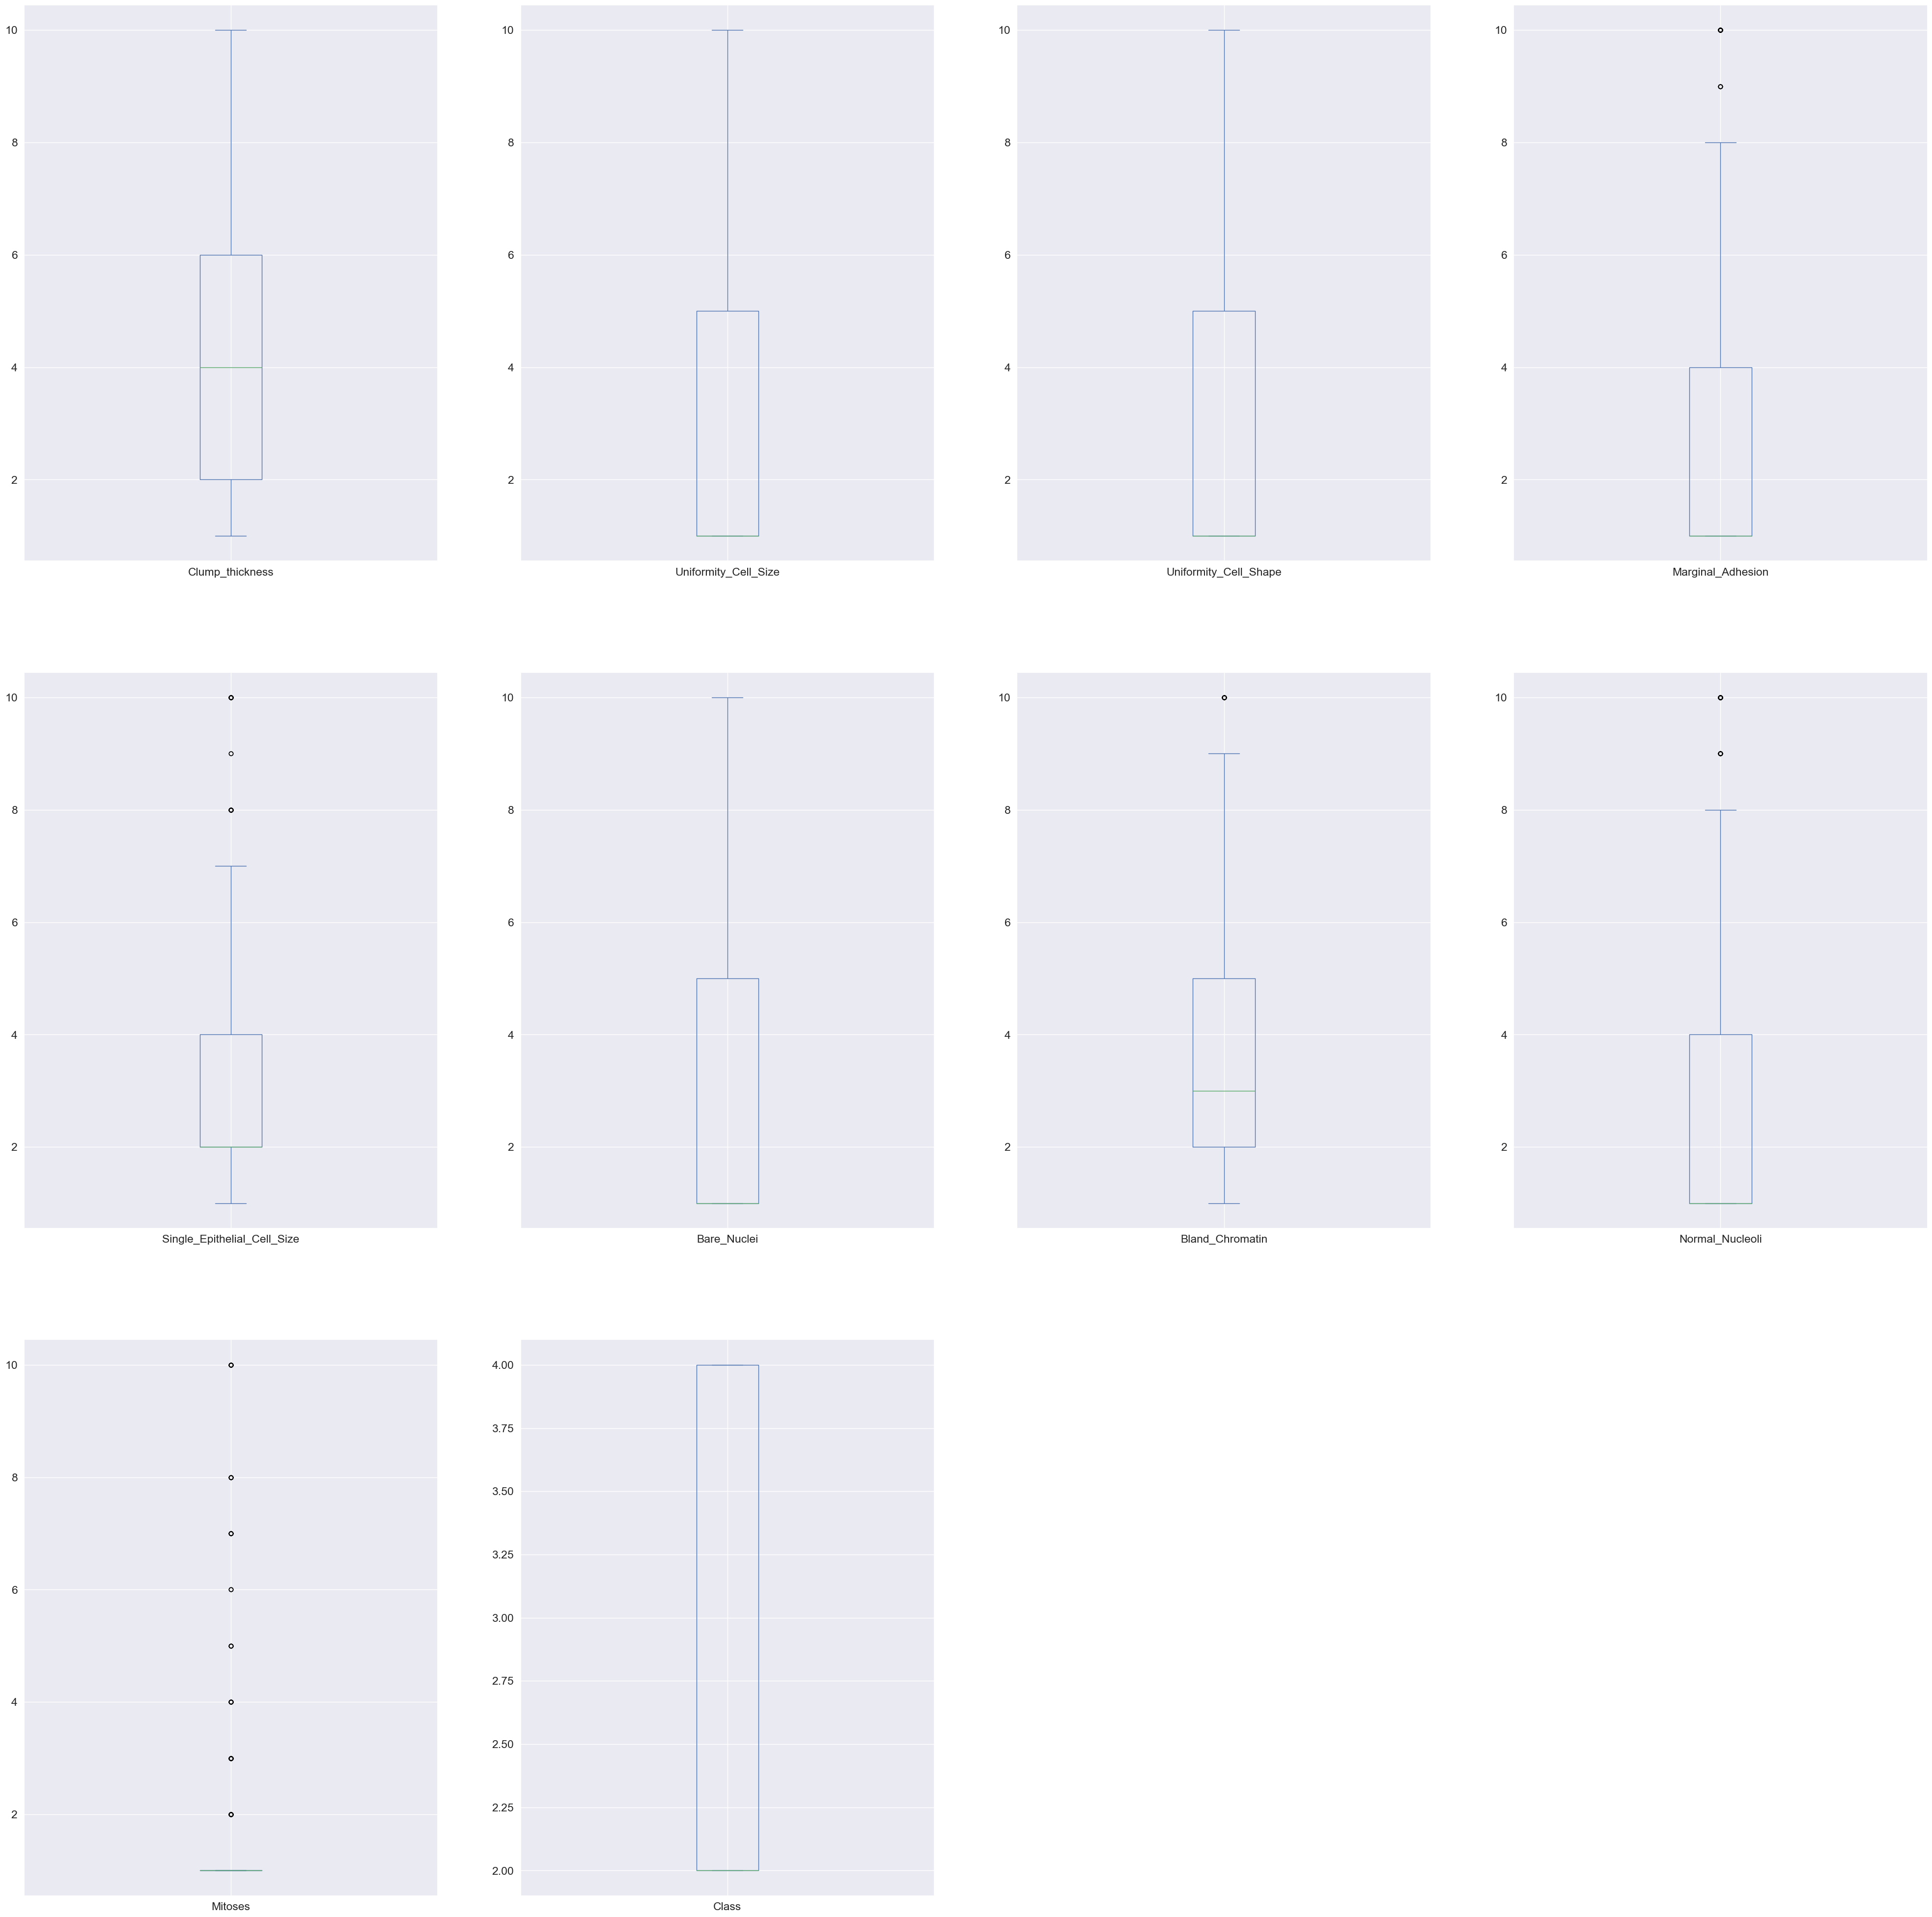

In [36]:
df.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(50,50))
sns.set(font_scale = 3)

All the min-max values are pretty close, meaning, there are no large differences in range between the min and max of a column.

5 columns out of 10 contain 1 to 3 outliers, except for the column 'Mistoses' that contains mostly outliers.

In [37]:

def identify_outliers(df, column_name):
    q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[column_name] if x < lower or x > upper]
    return len(outliers)

outliers_count = identify_outliers(df, 'Mitoses')
print(f"Identified outliers for 'Mitoses' out of 690 records: {outliers_count}")

outliers_count = identify_outliers(df, 'Single_Epithelial_Cell_Size')
print(f"Identified outliers for 'Single Epithelial Cell Size' out of 690 records: {outliers_count}")

outliers_count = identify_outliers(df, 'Marginal_Adhesion')
print(f"Identified outliers for 'Marginal Adhesion' out of 690 records: {outliers_count}")

outliers_count = identify_outliers(df, 'Normal_Nucleoli')
print(f"Identified outliers for 'Normal Nucleoli' out of 690 records: {outliers_count}")


Identified outliers for 'Mitoses' out of 690 records: 120
Identified outliers for 'Single Epithelial Cell Size' out of 690 records: 54
Identified outliers for 'Marginal Adhesion' out of 690 records: 60
Identified outliers for 'Normal Nucleoli' out of 690 records: 77


# Feature Scaling

In [40]:
df2=df.copy()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [47]:
scaled_data

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.14846494,  1.59563215,  0.94032386, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.14846494,  1.59563215,  1.61377302, ...,  0.37131451,
        -0.34391178,  1.37855538]])

# Model Selection 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Split data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their accuracy on the test set
print(models_test)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:02<00:00, 11.07it/s]

[LightGBM] [Info] Number of positive: 196, number of negative: 363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350626 -> initscore=-0.616288
[LightGBM] [Info] Start training from score -0.616288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.69it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.33it/s]

[LightGBM] [Info] Number of positive: 196, number of negative: 363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350626 -> initscore=-0.616288
[LightGBM] [Info] Start training from score -0.616288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

# Model Training

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.9786


In [82]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


knn_5.fit(X_train, y_train)


y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9786


# Model Evaluation

In [67]:
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [68]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)


Precision for each class: [0.98809524 0.96428571]
Recall for each class: [0.97647059 0.98181818]
F1-score for each class: [0.98224852 0.97297297]


In [69]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.9785714285714285


In [70]:
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.9791443850267381


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



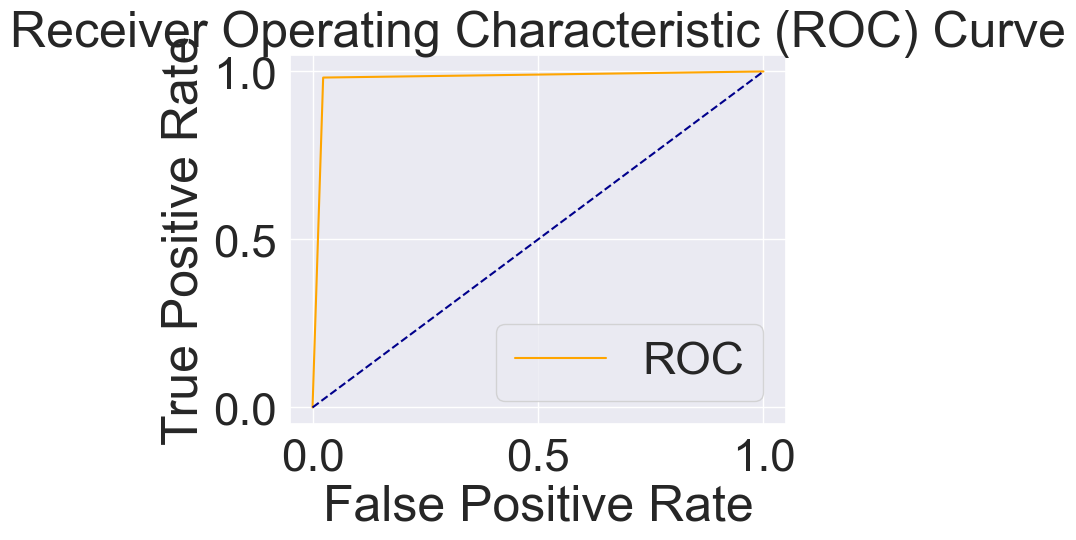

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# AFTER DROPPING COLUMN ONE BY ONE

In [83]:
df3=df.copy()
df3.drop(columns=['Mitoses'], inplace=True)


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df3.drop(['Class'], axis=1)
y = df3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9786


# FINAL RESULT

In this project, a k-Nearest Neighbors (kNN) classifier model was developed to classify patients with breast cancer. The model achieved high performance, with an accuracy of 97% using k=3.

With increasing K there us no sudden increase of accuracy .

We can see after dropping mitosis column which have lowest corraltion there is no change of accuracy of model